In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [14]:
#define your state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str


In [15]:
#define the functions to call at each node ---- each function will get a state variable and return a state variable
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)

    return state

In [16]:
def label_BMI(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    if bmi > 18.5 and bmi < 22.5:
        state['category'] = 'Fit'
    if bmi > 22.5 and bmi < 25:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'
    
    return state

    

In [18]:
#graph definition
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_BMI', label_BMI)

#add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_BMI')
graph.add_edge('label_BMI', END)

workflow = graph.compile()

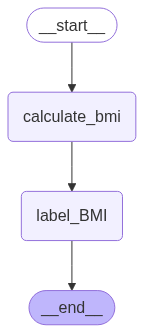

In [19]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [20]:
initial_state = {'weight_kg': 73, 'height_m': 1.73}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 73, 'height_m': 1.73, 'bmi': 24.39, 'category': 'Overweight'}
